# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

# Load Dataset

In [3]:
df = pd.read_csv('./Train.csv')
# df_test = pd.read_csv('./Test.csv')

In [4]:
# frames = [df_train, df_test]
# df = pd.concat(frames, axis=0)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

# Basic Information about Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
print(df['Item_Identifier'].value_counts())
print(df['Item_Fat_Content'].value_counts())
print(df['Item_Type'].value_counts())
print(df['Outlet_Identifier'].value_counts())
print(df['Outlet_Size'].value_counts())
print(df['Outlet_Location_Type'].value_counts())
print(df['Outlet_Type'].value_counts())
print(df['Outlet_Type'].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    279

# Data Analysis

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Check missing values

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Fill Missing Value 

In [11]:
print(df['Item_Weight'].mean())
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

12.857645184136183


In [12]:
value = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(value, inplace=True)


In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Distribution of Weight

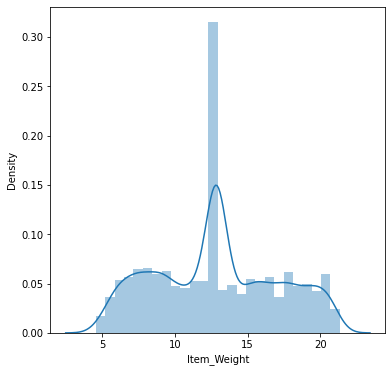

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

# Distribution of Item visibility

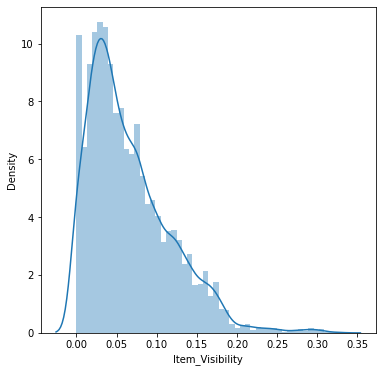

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

# Monthly Progress Report (MRP) Distribution

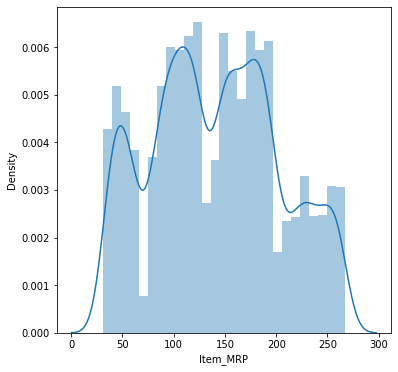

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

# Outlet Sales Distrbution

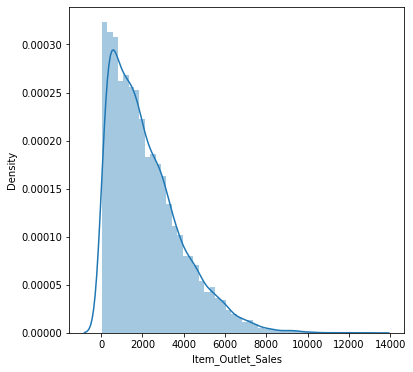

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

# Outlet_Establishment_Year ?Distribution

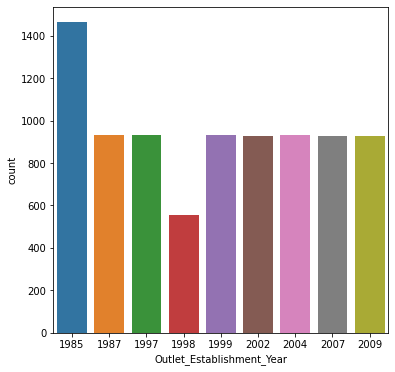

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

# Categorical Features

# Item_Fat_Content Categories

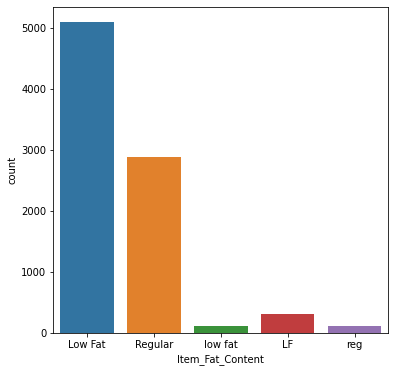

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

# Item_Type Categories

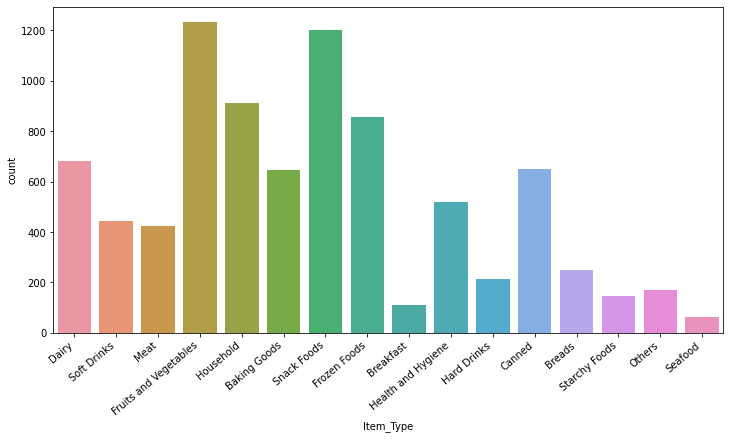

In [20]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Item_Type', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

# Outlet_Size Column

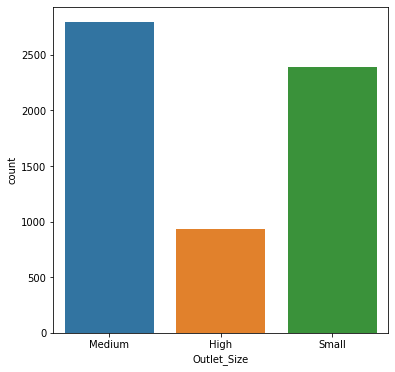

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

# Data Preprocessing

# Convert text to numeric features

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
df.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat', 'LF' : 'Low Fat', 
                    'reg' : 'Regular'}}, inplace=True)

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
el = LabelEncoder()

In [27]:
df['Item_Identifier'] = el.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = el.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = el.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = el.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = el.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = el.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = el.fit_transform(df['Outlet_Type'])


In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Seperating Dependent and Independent features

In [29]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [30]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [31]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting Training and Testing Data

In [32]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [33]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
print(X.shape, X_train.shape, Y_test.shape)

(8523, 11) (6818, 11) (1705,)


# Train Machine Learning Models

In [35]:
lr_model = LinearRegression()

In [36]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [37]:
lr_train_pred = lr_model.predict(X_train)
lr_train_r2_score = r2_score(Y_train, lr_train_pred)
print("R2 Score on Training data : ", lr_train_r2_score)

R2 Score on Training data :  0.5012583266882864


In [38]:
lr_test_pred = lr_model.predict(X_test)
lr_test_r2_score = r2_score(Y_test, lr_test_pred)
print("R2 Score on Training data : ", lr_test_r2_score)

R2 Score on Training data :  0.5048147459132308


# Apply GridSearchCV for improve performance of model

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [40]:
parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=parameters, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [41]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'fit_intercept': False, 'normalize': True}
0.4992946707808176


In [42]:
lr_train_pred = grid_search.predict(X_train)
lr_train_r2_score = r2_score(Y_train, lr_train_pred)
print("R2 Score on Training data : ", lr_train_r2_score)

R2 Score on Training data :  0.5011729270604669


In [43]:
lr_test_pred = grid_search.predict(X_test)
lr_test_r2_score = r2_score(Y_test, lr_test_pred)
print("R2 Score on Training data : ", lr_test_r2_score)

R2 Score on Training data :  0.5044241148425286


# Ridge Model

In [44]:
from sklearn.linear_model import Ridge, Lasso
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [45]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1, 'fit_intercept': True, 'normalize': True}
0.49938746961947


# Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor()

In [48]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [49]:
rf_train_pred = rf.predict(X_train)
rf_train_r2_score = r2_score(Y_train, lr_train_pred)
print("R2 Score on Training data : ", rf_train_r2_score)

R2 Score on Training data :  0.5011729270604669


In [50]:
rf_test_pred = rf.predict(X_test)
rf_test_r2_score = r2_score(Y_test, lr_test_pred)
print("R2 Score on Training data : ", rf_test_r2_score)

R2 Score on Training data :  0.5044241148425286


# Apply GridSearchCV for improve performance of model

In [51]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='r2')

In [56]:
print(grid_search.best_params_)
print(grid_search.best_score_)


{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
0.5956585212239676


In [57]:
rf_train_pred = grid_search.predict(X_train)
rf_train_r2_score = r2_score(Y_train, lr_train_pred)
print("R2 Score on Training data : ", rf_train_r2_score)

R2 Score on Training data :  0.5011729270604669


In [58]:
rf_test_pred = grid_search.predict(X_test)
rf_test_r2_score = r2_score(Y_test, lr_test_pred)
print("R2 Score on Training data : ", rf_test_r2_score)

R2 Score on Training data :  0.5044241148425286


In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
